In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import re
import numpy as np

In [2]:
df = pd.read_excel("Data_Science_Internship.xlsx")

In [3]:
df.head(5)

Unnamed: 0                                           Agent_id status   
0           0  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST  \
1           1  299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...   LOST   
2           2  c213697430c006013012dd2aca82dd9732aa0a1a6bca13...   LOST   
3           3  eac9815a500f908736d303e23aa227f0957177b0e6756b...   LOST   
4           4  1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...   LOST   

      lost_reason                budget                                lease   
0  Not responding                   NaN                                  NaN  \
1      Low budget                   NaN                                  NaN   
2  Not responding  £121 - £180 Per Week  Full Year Course Stay 40 - 44 weeks   
3      Low budget                   0-0                                    0   
4       Junk lead                   NaN                                  NaN   

      movein                                             source   
0        NaT  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  \
1        NaT  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2 2022-08-31  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
3        NaT  ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
4        NaT  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         source_city   
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  \
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...   
3  a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                      source_country   
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  \
1  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
2  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
3  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                          utm_source   
0  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...  \
1  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
2  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
3  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
4  3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   

                                          utm_medium   
0  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...  \
1  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   
2  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
3  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
4  268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...   

                                            des_city   
0  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...  \
1  5372372f3bf5896820cb2819300c3e681820d82c6efc54...   
2  11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...   
3  19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   

                                         des_country room_type   
0  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN  \
1  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
2  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...   Ensuite   
3  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...       NaN   
4  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...       NaN   

                                             lead_id  
0  cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...  
1  b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...  
2  96ea4e2bf04496c044745938c0299c264c3f4ba079e572...  
3  1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...  
4  fc10fffd29cfbe93c55158fb47752a7501c211d253468c...

In [4]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      46608 non-null  int64         
 1   Agent_id        46608 non-null  object        
 2   status          46608 non-null  object        
 3   lost_reason     43244 non-null  object        
 4   budget          42908 non-null  object        
 5   lease           44267 non-null  object        
 6   movein          32970 non-null  datetime64[ns]
 7   source          46608 non-null  object        
 8   source_city     46608 non-null  object        
 9   source_country  46608 non-null  object        
 10  utm_source      46608 non-null  object        
 11  utm_medium      46608 non-null  object        
 12  des_city        46608 non-null  object        
 13  des_country     46608 non-null  object        
 14  room_type       23061 non-null  object        
 15  le

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.isna().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [8]:
df.drop(df[(df["status"] != "LOST") & (df["status"] != "WON")].index, inplace = True)

In [9]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', 0, inplace=True)

In [10]:
df.lease.replace('lease', 0, inplace=True)


In [11]:
df.replace(0, np.nan, inplace=True)

In [12]:
df.dropna(thresh= 12, inplace= True)

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in ["lease"] and feature not in ["budget"] and feature not in ["room_type"] and feature not in ["lost_reason"]]
for i in df.columns:
        if i in categorical_features:
            df[i] = le.fit_transform(df[i])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36680 entries, 2 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        36680 non-null  int32         
 1   status          36680 non-null  int32         
 2   lost_reason     34402 non-null  object        
 3   budget          36672 non-null  object        
 4   lease           32924 non-null  object        
 5   movein          28347 non-null  datetime64[ns]
 6   source          36680 non-null  int32         
 7   source_city     36680 non-null  int32         
 8   source_country  36680 non-null  int32         
 9   utm_source      36680 non-null  int32         
 10  utm_medium      36680 non-null  int32         
 11  des_city        36680 non-null  int32         
 12  des_country     36680 non-null  int32         
 13  room_type       22825 non-null  object        
 14  lead_id         36680 non-null  int32         
dtypes: date

In [15]:
df["lease"].unique()

array(['Full Year Course Stay 40 - 44 weeks', nan, 'semester-stay', 51,
       'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', 44, 18,
       'Summer/Short Stay 8 - 12 weeks', 'other', 'short-stay',
       '44 weeks', 12, '1 year', 43, 'full year stay', 294,
       '20 - 24 weeks', '1 year .', 48, 40, 6, 8, 84, 'full course', 45,
       39, 1, 50, 25, '45 weeks', '6 weeks', 32, '44/week', 42, '3 month',
       '44-51 weeks', '3 months', '6 months', '2 years', '51weeks', 10,
       52, '2 weeks', '52 weeks', 46, 13, 'short stay', 4, '52weeks',
       'FULL YEAR', 69, 16, '50 - 52 weeks', '44 - 51 weeks', '4-8 weeks',
       '4 weeks', 3, 'Full year stay', 11, 'Academic year', '10-15 weeks',
       '40-44', '52 weeks]', 26, '40 - 44 weeks', '51 week', '36 - 44',
       140, 41, '44/51 weeks', '40 weeks', '12-24', '1 month',
       '10 months', '44 WEEKS', 2, '24-44 weeks', 350, '06 month

In [111]:
df["lease"] = df["lease"].str.replace("\\", " ")
df["lease"] = df["lease"].str.replace("/", " ")
df["lease"] = df["lease"].str.replace("mnth", "months")
df["lease"] = df["lease"].str.replace("Stay", "")
df["lease"] = df["lease"].str.replace("weeeks", "")
df["lease"] = df["lease"].str.replace("2 years", "100")
df["lease"] = df["lease"].str.replace("Other", "0", flags= re.IGNORECASE)
df["lease"] = df["lease"].str.replace("44 51", "45")
df["lease"] = df["lease"].str.replace("WEEKS", "weeks")
df["lease"] = df["lease"].str.replace("not sure", "0")
df["lease"] = df["lease"].str.replace("ASAP", "0")
df["lease"] = df["lease"].str.replace("3 years", "150")
df["lease"] = df["lease"].str.replace("1 month ", "4")
df["lease"] = df["lease"].str.replace("<=8", "8")
df["lease"] = df["lease"].str.replace("7 days", "1")
df["lease"] = df["lease"].str.replace("44 or 51 ", "45")
df["lease"] = df["lease"].str.replace("51s", "51")
df["lease"] = df["lease"].str.replace("Weeks", "week")


In [77]:
df.loc[df["lease"].str.contains("Full year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1 year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("1year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full yyear",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("Full-COURSE",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("COMPLETE ",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("SEM",na= False, flags= re.IGNORECASE), "lease"] = "22 weeks"
df.loc[df["lease"].str.contains("SHORT",na= False, flags= re.IGNORECASE), "lease"] = "9 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("dec",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("whole year",na= False, flags= re.IGNORECASE), "lease"] = "42 weeks"
df.loc[df["lease"].str.contains("full course",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("academic",na= False, flags= re.IGNORECASE), "lease"] = "52 weeks"
df.loc[df["lease"].str.contains("aug",na= False, flags= re.IGNORECASE), "lease"] = "32 weeks"


In [18]:
b = df[df["lease"].str.endswith(("month","mnth","months","m"), na=False)]

In [19]:
b[["start", "end"]] = b["lease"].str.split(" ", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\3033190592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[["start", "end"]] = b["lease"].str.split(" ", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\3033190592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[["start", "end"]] = b["lease"].str.split(" ", expand=True)


In [20]:
b = b.drop("end", axis=1)


In [21]:
b["start"] = b["start"].str.replace("long", "12")
b["start"] = b["start"].str.replace("pm","")
b["start"] = b["start"].str.replace("months","")
b["start"] = b["start"].str.replace("m","")
b["start"] = b["start"].str.replace("-", "+")


In [22]:
for i in b["start"].index:
    if "+" in b["start"][i]:
        print(b["start"][i])
        j = b["start"][i]
        l,m = j.split("+")
        b["start"][i]= (int(l)+int(m))/2

500+550
5+6
2+3
9+12
3+4
6+8
2+3
3+4
1+2
3+5
1+2


C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1825934209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["start"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1825934209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["start"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1825934209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["start"][i]= (int(l)+int(m))/2
C:\Users\M

In [23]:
b["lease"] = (b["start"].astype(int)) * 4
b["lease"] = b["lease"].replace(2100, 0)
b

Agent_id  status    lost_reason                budget  lease   
943          35       0     Short stay   £60 - £120 Per week     12  \
982          28       0  Not a student               2200 pm     12   
1064         19       0  Not a student            1000/month     24   
2958         28       0     Low budget             600-610pm     12   
3014         63       0     Short stay  £121 - £180 Per Week      4   
...         ...     ...            ...                   ...    ...   
42325        97       0     Low budget               60/week     36   
42780        61       0     Short stay   £60 - £120 Per week      4   
45555       105       0     Short stay                   0-0      4   
46202        61       0  Not a student                   0-0     12   
46323        19       0  Semester stay                   170     24   

          movein  source  source_city  source_country  utm_source  utm_medium   
943   2022-09-14     126         3029              99          20           3  \
982   2022-09-01     164         3868             163           9           3   
1064         NaT     164         3265             163          20          30   
2958  2022-09-10      18         4173             180          15           4   
3014  2022-09-02     126         3868             163          20           3   
...          ...     ...          ...             ...         ...         ...   
42325 2022-09-11     126         2596             163          20           3   
42780 2022-08-27     126          339             163          20           3   
45555        NaT     278         2921             163          20          30   
46202        NaT     232         3868             163           9           3   
46323 2022-09-15      18         4173             180          15           4   

       des_city  des_country     room_type  lead_id start  
943          18            8  Entire Place    23295     3  
982         194            8           NaN    23063     3  
1064        200            8           NaN     4483     6  
2958        194            8           NaN    14519     3  
3014        194            8        Studio    13352     1  
...         ...          ...           ...      ...   ...  
42325        35            8       Ensuite     3726     9  
42780        87            8           NaN     6658     1  
45555       151            8           NaN    18330     1  
46202       151            8           NaN    22561     3  
46323       109            8           NaN    18216     6  

[67 rows x 16 columns]

In [24]:
b.drop("start", axis=1 , inplace=True)
b["lease"] = b["lease"].astype(str)
df.update(b)

In [25]:
df = df.reset_index(drop=True)

In [26]:
df["budget"].nunique()
df["budget"].iloc[18738] = "0"


C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\717191123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"].iloc[18738] = "0"


In [27]:
df["budget"] = df["budget"].str.replace("pw", " Per Week")
df["budget"] = df["budget"].str.replace("pcm", " per month")
df["budget"] = df["budget"].str.replace("PCM", " per month")
df["budget"] = df["budget"].str.replace("pm", " per month")
df["budget"] = df["budget"].str.replace("  Per Week -151 ", "-151")
df["budget"] = df["budget"].str.replace("0 month", "0 per month")
df["budget"] = df["budget"].str.replace("0 week", "0 Per Week")
df["budget"] = df["budget"].str.replace(" Per Week", "")
df["budget"] = df["budget"].str.replace(" Per week", "")
df["budget"] = df["budget"].str.replace(" per week ", "")
df["budget"] = df["budget"].str.replace(" per weeks", "")
df["budget"] = df["budget"].str.replace("per ek", " Per Week")
df.loc[df["budget"].str.contains("no",na= False, flags= re.IGNORECASE), "budget"] = "0"

In [28]:
df["budget"] = df["budget"].str.replace("Per week", "")
df["budget"] = df["budget"].str.replace(" per week", "")
df["budget"] = df["budget"].str.replace("£", "")
df["budget"] = df["budget"].str.replace("0-0", "0")
df["budget"] = df["budget"].str.replace("/", " ")
df["budget"] = df["budget"].replace(np.nan, "0")
df["budget"] = df["budget"].str.replace("month ", " per month")
df.budget = df.budget.str.replace("160 200", "160-200")




In [29]:
df["budget"] = df["budget"].str.replace(">", "")
df["budget"] = df["budget"].str.replace("0-100 Pounds", "0-113")
df["budget"] = df["budget"].str.replace("0-200-400", "200")
df["budget"] = df["budget"].str.replace("€", "")

In [30]:
df["budget"] = df.budget.str.replace("s", "")
df["budget"] = df.budget.str.replace("Le than  ", "")
df["budget"] = df.budget.str.replace("0-60 to 75", "70")
df["budget"] = df.budget.str.replace("0-200-260", "200-260")
df["budget"] = df.budget.str.replace("Around 400 pound", "450")
df["budget"] = df.budget.str.replace("prw", "")
df["budget"] = df.budget.str.replace("0-10,000 GBP PA", "0-235")
df["budget"] = df.budget.str.replace("cheapet-highet", "0 - 100")
df["budget"] = df.budget.str.replace("0-260-275", "270")
df["budget"] = df.budget.str.replace("50 -60 gbp", "55-65")
df["budget"] = df.budget.str.replace("0-120 140", "130")
df["budget"] = df.budget.str.replace("0-120 to 180", "150")
df["budget"] = df.budget.str.replace("0-5-10 lakh", "115-230")
df["budget"] = df.budget.str.replace("90-100 gbp", "110")
df["budget"] = df.budget.str.replace("max budget", "")

In [31]:
df["budget"] = df["budget"].str.replace("0-130-175", "0-175")
df["budget"] = df["budget"].str.replace("flexible", "100")
df["budget"] = df["budget"].str.replace("maximum", "")
df["budget"] = df["budget"].str.replace("0-Between", "")
df["budget"] = df["budget"].str.replace("110 s", "110")
df["budget"] = df["budget"].str.replace("flexible", "100")


In [32]:
df.budget.iloc[610] = "0"
df.room_type.iloc[610] = "ensuite"

C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\3455741886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.budget.iloc[610] = "0"
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\3455741886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.room_type.iloc[610] = "ensuite"


In [33]:
df["budget"] = df["budget"].str.replace(" week", "")
df["budget"] = df["budget"].str.replace(" WEEK", "")
df["budget"] = df["budget"].str.replace(" W", "")
df["budget"] = df["budget"].str.replace("week", "")
df["budget"] = df.budget.str.replace("Pereek", "")
df["budget"] = df["budget"].str.replace("7000 pound", "165")
df["budget"] = df["budget"].str.replace("month.", "month")

df["budget"] = df["budget"].str.replace("momth", "month")


In [34]:
df["budget"] = df['budget'].replace(np.nan, 0)

In [35]:
a = df[df["budget"].str.endswith("month", na=False)]
a[["start", "end"]] = a["budget"].str.split("per month", expand=True)


C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\4154026710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["budget"].str.split("per month", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\4154026710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "end"]] = a["budget"].str.split("per month", expand=True)


In [36]:
a["start"] = a["start"].str.replace("500 600", "500-600")
a["start"] = a["start"].str.replace(">", "0-")


C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\3908497720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("500 600", "500-600")
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\3908497720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace(">", "0-")


In [37]:
a.head(10)

Agent_id  status                  lost_reason              budget   
245         60       0                   Low budget      500  per month  \
380         20       0             Low availability           850 month   
720         28       0                Not a student     2200  per month   
785         19       0                Not a student          1000 month   
889         11       0  Wants private accommodation  1300 -1500   month   
980         28       0  Wants private accommodation       950 per month   
1220        61       0               Not interested           500 month   
1284        20       0             Low availability         0-600 month   
1499       104       1                          NaN       600 per month   
1667        60       0                   Low budget      400  per month   

              lease     movein  source  source_city  source_country   
245             NaN        NaT     127          103              99  \
380        51 weeks 2022-09-09     127          638              99   
720              12 2022-09-01     164         3868             163   
785              24        NaT     164         3265             163   
889        52 weeks 2022-09-01      43         4173             180   
980        44 weeks 2022-09-03      18         4173             180   
1220  44 - 51 weeks 2022-09-30     126          515              99   
1284            NaN 2022-09-10     243          301             142   
1499            NaN 2022-08-16     245         1503              33   
1667       51 weeks        NaT     164         2121              99   

      utm_source  utm_medium  des_city  des_country room_type  lead_id   
245           20           3       176            8       NaN    15874  \
380           20           3        11            0       NaN     4355   
720            9           3       194            8       NaN    23063   
785           20          30       200            8       NaN     4483   
889           15           2       194            8       NaN    13688   
980           15           4       194            8       NaN    24175   
1220          20           3       130            8   Ensuite    16543   
1284          20          30        69            8       NaN     5684   
1499          20           3       160            8       NaN     2968   
1667          20           3       206            8       NaN     6457   

                   start   end  
245                500          
380            850 month  None  
720               2200          
785           1000 month  None  
889   1300 -1500   month  None  
980                 950         
1220           500 month  None  
1284         0-600 month  None  
1499                600         
1667               400

In [44]:
df.lease.iloc[34527] = "12 weeks"
df.lease.iloc[9806] = "4 weeks"
df.lease.iloc[27381] = "51"
df.lease.iloc[30763] = "44"

C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1269219864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lease.iloc[34527] = "12 weeks"
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1269219864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lease.iloc[9806] = "4 weeks"
C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1269219864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lease.iloc[27381] = "51"
C:\Users\MGC\Ap

In [74]:
for i in df.lease.index:
    if df.lease.iloc[i] == "-":
        df.lease.iloc[i] = ""

In [60]:
df.lease = df.lease.astype(str)


In [112]:
for i in df.lease.index:
    if "week" in df.lease.iloc[i]:
        j = df["lease"].iloc[i]
        l,m = j.split("w",1)
        df["lease"][i]= (l)
    elif df.lease.iloc[i] == "":
        df.lease.iloc[i] = "0"

C:\Users\MGC\AppData\Local\Temp\ipykernel_8300\1588468569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lease"][i]= (l)


In [78]:
for i in df.lease.index:
    if "-" in df.lease.iloc[i]:
        j = df["lease"].iloc[i]
        l,m = j.split("-",1)
        df["lease"][i]= (int(l)+int(m))/2

In [75]:
df.lease = df["lease"].replace("nan", "0")

In [113]:
df.lease.astype(float)


ValueError: could not convert string to float: '43 44 '

In [110]:
df.iloc[36242]

Agent_id                           28
status                              0
lost_reason            Not interested
budget                            120
lease                        51 Weeks
movein            2022-09-01 00:00:00
source                            199
source_city                      2195
source_country                    163
utm_source                         20
utm_medium                          3
des_city                            6
des_country                         8
room_type                         NaN
lead_id                         23802
Name: 36242, dtype: object

In [114]:
for i in df.lease.index:
    if "43 44" in df.lease[i]:
        print(i)

24312


In [ ]:
a[["start", "end"]] = a["start"].str.split("month", expand=True,n=1)


AttributeError: Can only use .str accessor with string values!

In [ ]:
a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[["start", "middle", "last"]] = a["start"].str.split("-", expand=True)
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\4288818770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
a["start"] = a["start"].replace(np.nan, 0)

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1161830120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].replace(np.nan, 0)


In [ ]:
a["middle"] = a["middle"].str.replace("Per","")


C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1761696780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = a["middle"].str.replace("Per","")


In [ ]:
a["start"] = a["start"].str.replace("p","")
a["start"] = a["start"].str.replace("a","")
a["start"] = a["start"].str.replace("Per","")
a["start"] = a["start"].str.replace("m","")



C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\114217097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("p","")
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\114217097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = a["start"].str.replace("a","")
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\114217097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
a["middle"] = a["middle"].replace(np.nan, 0)

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\2583533446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = a["middle"].replace(np.nan, 0)


In [ ]:
a["start"] = (a["start"]).astype(int)
a["middle"] = (a["middle"]).astype(int)


C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\2335306655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = (a["start"]).astype(int)
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\2335306655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = (a["middle"]).astype(int)


In [ ]:
a["start"] = (a["start"]/4)
a["middle"] = (a["middle"]/4)

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\11739153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["start"] = (a["start"]/4)
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\11739153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["middle"] = (a["middle"]/4)


In [ ]:
a = a.drop("end", axis=1)
a = a.drop("last", axis=1)

In [ ]:
a

Agent_id  status                  lost_reason              budget   
245          60       0                   Low budget      500  per month  \
380          20       0             Low availability           850 month   
720          28       0                Not a student     2200  per month   
785          19       0                Not a student          1000 month   
889          11       0  Wants private accommodation  1300 -1500   month   
...         ...     ...                          ...                 ...   
37414        19       0                Not a student           450 month   
37467        60       0                   Low budget      450  per month   
37497       111       0       Booked with competitor       350 per month   
37667        60       0                   Low budget      350  per month   
38281        20       0             Low availability    0-500  per month   

           lease     movein  source  source_city  source_country  utm_source   
245          NaN        NaT     127          103              99          20  \
380     51 weeks 2022-09-09     127          638              99          20   
720           12 2022-09-01     164         3868             163           9   
785           24        NaT     164         3265             163          20   
889     52 weeks 2022-09-01      43         4173             180          15   
...          ...        ...     ...          ...             ...         ...   
37414   51 weeks 2022-09-07     126         3172             163          20   
37467   52 weeks 2022-09-09     280         3785              99          20   
37497  51  weeks 2022-09-09     280         2619              99          20   
37667   51 weeks 2022-09-20     280          456              99          12   
38281        NaN 2022-09-10     243         2605              99          20   

       utm_medium  des_city  des_country     room_type  lead_id  start  middle  
245             3       179            8           NaN    16410  125.0     0.0  
380             3        11            0           NaN     4525  212.5     0.0  
720             3       198            8           NaN    23829  550.0     0.0  
785            30       204            8           NaN     4657  250.0     0.0  
889             2       198            8           NaN    14152  325.0   375.0  
...           ...       ...          ...           ...      ...    ...     ...  
37414           3       168            8       Ensuite    26548  112.5     0.0  
37467           3       204            8  Entire Place    21967  112.5     0.0  
37497           3       210            8       Ensuite    13000   87.5     0.0  
37667           0        48            8  Entire Place    22552   87.5     0.0  
38281          30        47            8           NaN    14901    0.0   125.0  

[161 rows x 17 columns]

In [ ]:
 
def concat_col_mid(data: pd.DataFrame):
    start_col = data['start']
    middle_col = data['middle']
    
    for row in data.index:
        start_value = start_col[row]
        middle_col_val = middle_col[row]
        
        new_value = f"{int(start_value)}-{int(middle_col_val)}" if not int(middle_col_val) == 0 else str(int(start_value))
        data["budget"][row] = new_value
    
    return data
        
        

a = concat_col_mid(a)
    
    

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\2723283949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\2723283949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\2723283949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budget"][row] = new_value
C:\Users\M

In [ ]:
for i in a["budget"].index:
    if "-" in a["budget"][i]:
        j = a["budget"][i]
        l,m = j.split("-")
        a["budget"][i]= (int(l)+int(m))/2

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1434788163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1434788163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1434788163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["budget"][i]= (int(l)+int(m))/2
C:\User

In [ ]:
for i in df["budget"].index:
    if "-" in df["budget"][i] and "month" not in df["budget"][i]:
        j = df["budget"][i]
        l,m = j.split("-")
        df["budget"][i]= (int(l)+int(m))/2
    elif "pound" in df["budget"].iloc[i]:
        j = df["budget"][i]
        l,m = j.split("p")
        df["budget"][i]= int(float(l) * 1.13)

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1094049457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1094049457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1094049457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"][i]= (int(l)+int(m))/2
C:\U

In [ ]:

df.update(a)


In [ ]:
df.budget = df.budget.astype(str)

In [ ]:
for i in df.budget:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [ ]:
df.budget.head(60)

0     150.5
1         0
2         0
3         0
4     210.5
5         0
6         0
7         0
8     150.5
9     150.5
10    210.5
11        0
12        0
13        0
14     90.0
15     90.0
16        0
17     90.0
18     90.0
19     90.0
20    210.5
21      180
22     90.0
23    210.5
24        0
25        0
26    210.5
27    150.5
28        0
29        0
30     90.0
31        0
32        0
33     90.0
34        0
35     90.0
36     90.0
37     90.0
38     90.0
39    210.5
40     90.0
41      300
42    150.5
43        0
44    150.5
45     90.0
46     90.0
47        0
48    150.5
49    210.5
50     90.0
51        0
52     90.0
53        0
54    150.5
55     90.0
56    150.5
57        0
58     90.0
59        0
Name: budget, dtype: object

In [ ]:
df["budget"].iloc[23305] = "0"
df["room_type"].iloc[23305] = "studio"

C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1357470940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"].iloc[23305] = "0"
C:\Users\MGC\AppData\Local\Temp\ipykernel_9792\1357470940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["room_type"].iloc[23305] = "studio"


In [ ]:
df.budget = df.budget.str.replace("EPW", "")
df.budget = df.budget.str.replace("300 per ek", "300")
df.budget = df.budget.str.replace("PW", "")
df.budget = df.budget.str.replace("euro", "")
df.budget = df.budget.str.replace("be30 100 gbp", "72")
df.budget = df.budget.str.replace("(30 budget)", "")
df.budget = df.budget.str.replace("460  per month", "115")
df.budget = df.budget.str.replace('1000 per  per monthfor 3', "85")
df.budget = df.budget.str.replace("400 m", "100")
df.budget = df.budget.str.replace("600 Per monthly", "150")
df.budget = df.budget.str.replace("500  per month", "125")
df.budget = df.budget.str.replace("44 51", "45")
df.budget = df.budget.str.replace("max", "")
df.budget = df.budget.str.replace("tbh", "0")
df.budget = df.budget.str.replace("165 170", "165")
df.budget = df.budget.str.replace("300ly", "300")
df.budget = df.budget.str.replace("100 Gbpo", "110")
df.budget = df.budget.str.replace("tbd", "0")
df.budget = df.budget.str.replace("Be30 200 GBP", "128")
df.budget = df.budget.str.replace("low", "30")
df.budget = df.budget.str.replace("30et", "30")
df.budget = df.budget.str.replace("100 p for 2 people", "50")
df.budget = df.budget.str.replace("okay with", "0")
df.budget = df.budget.str.replace("0 250", "125")
df.budget = df.budget.str.replace("na", "0")
df.budget = df.budget.str.replace("na", "0")
df.budget = df.budget.str.replace("\\", "")
df.budget = df.budget.str.replace("PPW", "")
df.budget = df.budget.str.replace("150$", "135")
df.budget = df.budget.str.replace("460 month max", "115")
df.budget = df.budget.str.replace("w", "")
df.budget = df.budget.str.replace("200 to 210", "205")
df.budget = df.budget.str.replace("700PPM", "175")
df.budget = df.budget.str.replace("1000 per month for 3", "85")
df.budget = df.budget.str.replace("cheapet", "0")
df.budget = df.budget.str.replace("500 PM", "125")
df.budget = df.budget.str.replace("150'", "150")
df.budget = df.budget.str.replace("P", "")


In [ ]:
df.budget = df.budget.astype(float)


In [ ]:
df.budget = df.budget.astype(int)

In [ ]:
df["lost_reason"].unique()

array(['Not responding', 'Low budget', 'Wants private accommodation',
       'Short stay', 'Booked with manager', 'Low availability',
       'Junk lead', 'Not interested', 'Just Enquiring', 'Distance issue',
       'Not a student', 'Semester stay', 'Supply issue', nan, 'No supply',
       'Booked with competitor', 'Inadequate details',
       'Not going to university', 'Junk lead/ Just Enquiring',
       'Lead issue', 'Repeat lead', 'Booked on campus accommodation',
       'Not serving in that region', 'Looking for admission',
       'Underage student', 'Guarantor issue', "Didn't respond in time",
       'Visa/admission denied', 'Looking for Scholarship',
       'Looking for loan', 'Cross sell'], dtype=object)

In [ ]:
df["room_type"] = df["room_type"].replace(['Ensuite', np.nan, 'Entire Place', 'Studio', 'Twin-Studio',
       'Non-Ensuite'],[3,5,0,2,1,4])

In [ ]:
df["room_type"].unique()

array([3, 5, 0, 2, 'ensuite', 1, 4, 'studio'], dtype=object)

In [ ]:
df.reset_index(inplace= True, drop= True)

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
for i in df.columns:
        if i in categorical_features:
            df[i] = df[i].astype("str")

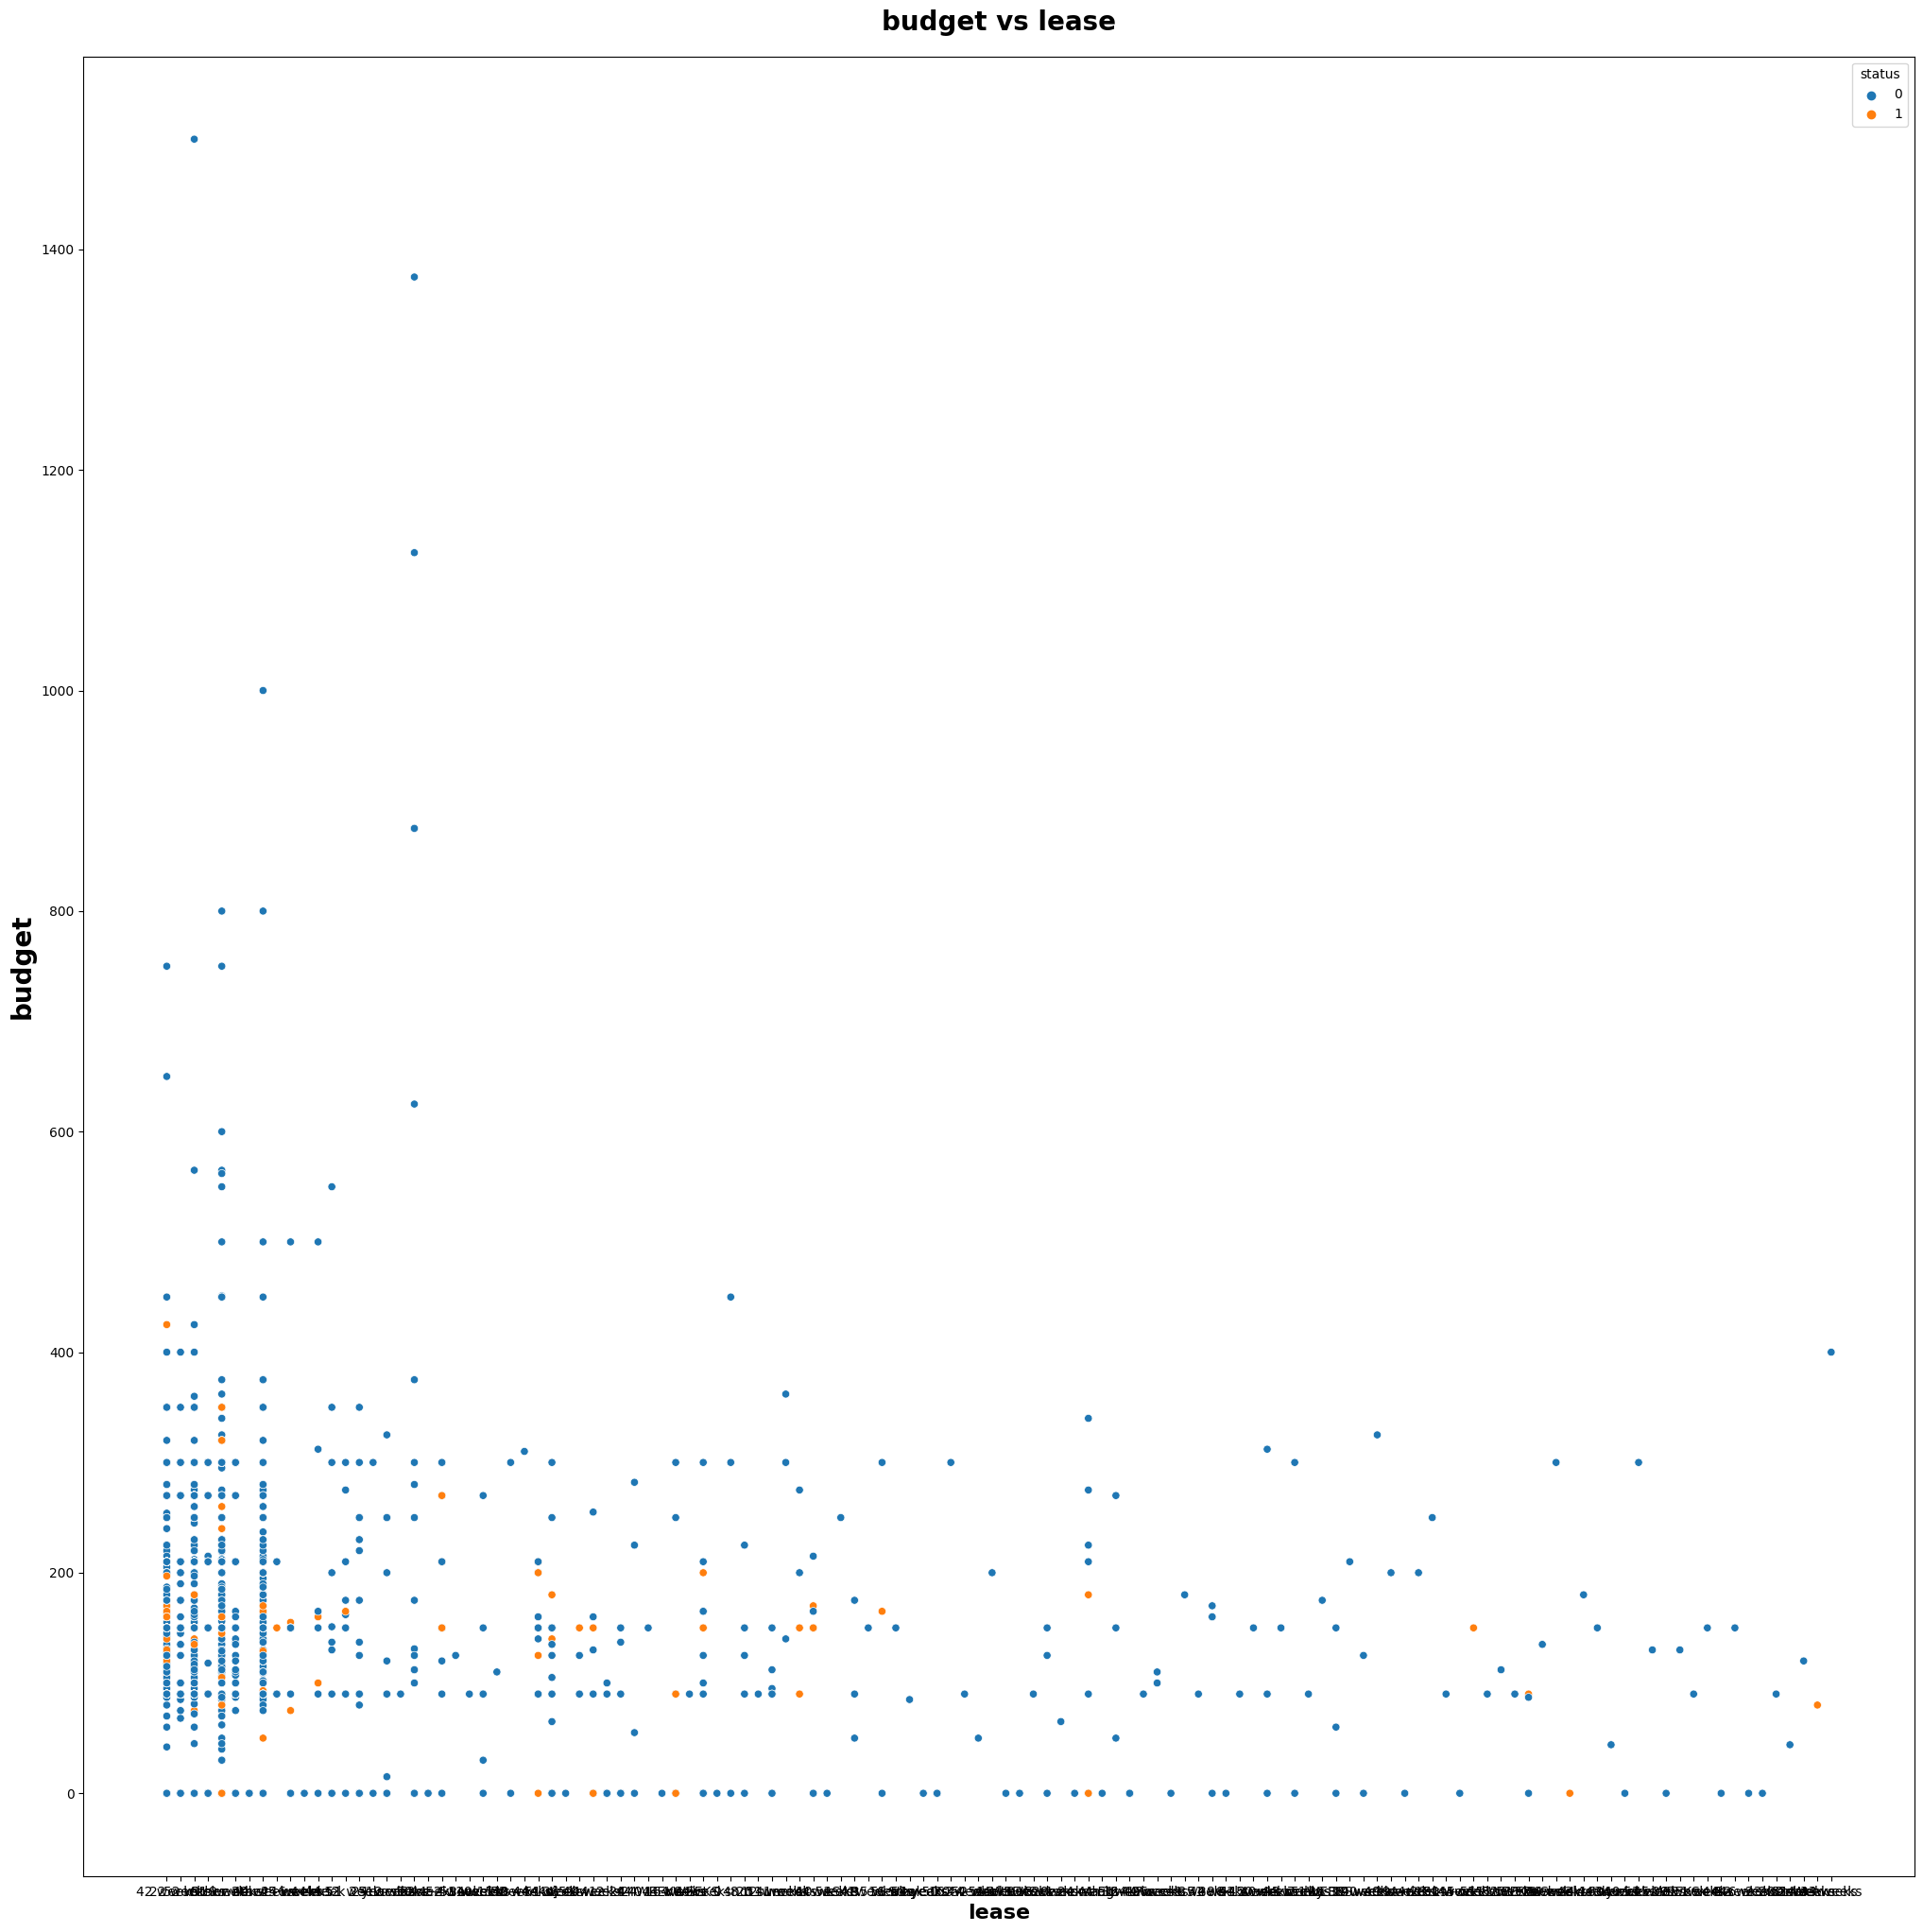

In [ ]:
plt.subplots(figsize=(25,25))
sns.scatterplot(x="lease", y='budget', data=df,ec = "white",color='b', hue='status')
plt.title("budget vs lease", weight="bold",fontsize=20, pad=20)
plt.ylabel("budget", weight="bold", fontsize=20)
plt.xlabel("lease", weight="bold", fontsize=16)
plt.show()